This notebook uses boto3 to access a waveform file that has been decimated by your Lambda function.
Requirements:
boto3
botocore
obspy

In [1]:
# Uncomment and run if boto3 is not installed.
#%pip install boto3

In [2]:
# Replace 'lambda-bucket-3909' with the name of the S3 bucket where your decimated waveforms are stored.
BUCKET_NAME = 'lambda-output-3909'

# Replace key name with the output key returned by the Lambda function or API.
KEY='decimated/2016/2016_123/CIPASC_HHZ00_2016123.ms'

If you will be using environment variables to store your credentials, run the export commands before running this notebook.

In [3]:
import obspy
from obspy import read
import boto3

# If you do not have credentials set as environment variables or in ~/.aws/credentials or ~/.aws/config, 
# you will need to replace ACCESS_KEY, SECRET_KEY, and TOKEN, and uncomment and run the following code:
#session = boto3.Session(
#    aws_access_key_id=ACCESS_KEY,
#    aws_secret_access_key=SECRET_KEY,
#    aws_session_token=SESSION_TOKEN
#)

# If your credentials are already set, you can run the next line.
session = boto3.Session()


s3 = session.client('s3')

In [4]:
s3.download_file(BUCKET_NAME, KEY,'output.ms')

In [5]:
ch = read('output.ms')
print (ch)

1 Trace(s) in Stream:
CI.PASC.00.HHZ | 2016-05-02T19:32:07.968394Z - 2016-05-02T23:59:59.968394Z | 25.0 Hz, 401801 samples


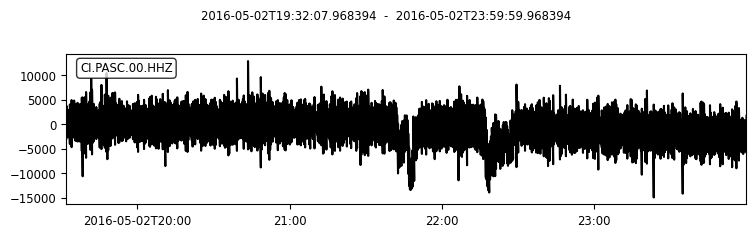

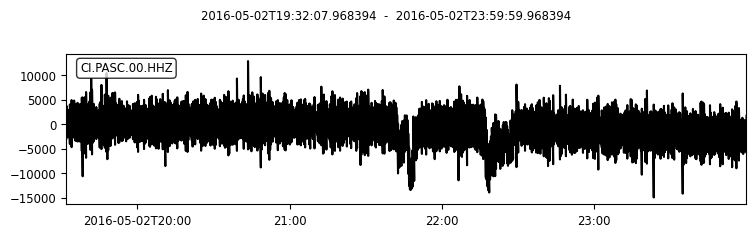

In [6]:
ch.plot()